# Time Series com Darts 
## Importanto os dados

In [94]:
from darts.datasets import AirPassengersDataset
df = AirPassengersDataset().load().pd_dataframe()

In [95]:
df = df.reset_index()
df.head()

component,Month,#Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [96]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

In [97]:
#series

## Separando em treino e teste

In [98]:
from darts.models import ExponentialSmoothing
import pandas as pd

train, val = series.split_before(pd.Timestamp('19580101'))

model = ExponentialSmoothing()
model.fit(train)
prediction_exp = model.predict(len(val),num_samples=500)

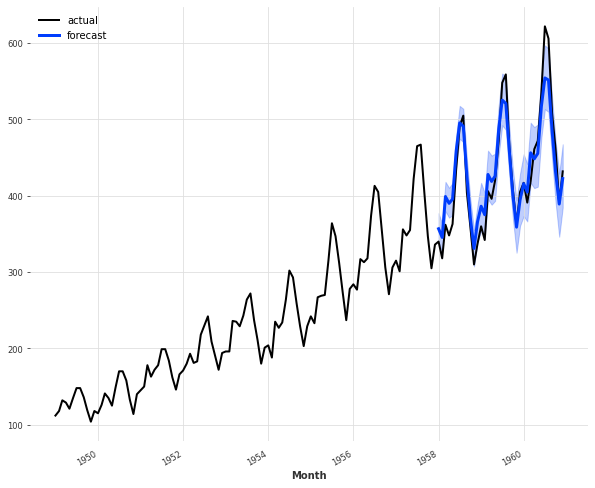

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.show()

In [100]:
# textando o ARIMA com a função AutoArima
from darts.models import AutoARIMA

model_aarima = AutoARIMA(start_p=2, max_p=6)
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

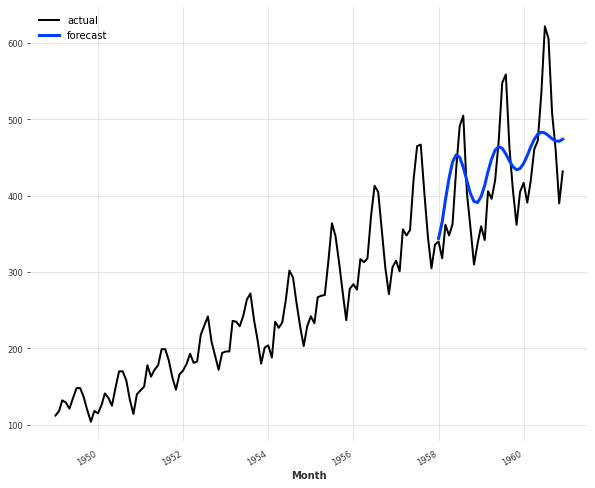

In [101]:
plt.figure(figsize=(10,8))
series.plot(label='actual')
prediction_aarima.plot(label='forecast', lw=3)
plt.legend()
plt.show()

## Avaliando o modelo

In [102]:
from darts.metrics import mape, mae, mse, rmse

def eval(val,prediction):
    MAPE = mape(val,prediction)
    MAE = mae(val,prediction)
    MSE = mse(val,prediction) 
    RMSE = rmse(val,prediction)

    print(f'MAPE: {MAPE}')
    print(f'MAE: {MAE}')
    print(f'MSE: {MSE}')
    print(f'RMSE: {RMSE}')


In [103]:
# MODELO DO ARIMA
eval(val, prediction_aarima)

MAPE: 11.654167189701772
MAE: 49.48829988194916
MSE: 3505.370230771742
RMSE: 59.20616716839338


In [104]:
# MODELO DO EXP_SMOT 
eval(val, prediction_exp)

MAPE: 5.108915467653458
MAE: 21.64799768897158
MSE: 680.7960526400161
RMSE: 26.092068768881017


## LSTM

In [105]:
from darts.models import RNNModel

model_lstm = RNNModel(input_chunk_length=100,model='LSTM')
model_lstm.fit(train)
prediction_lstm = model_lstm.predict(len(val))

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

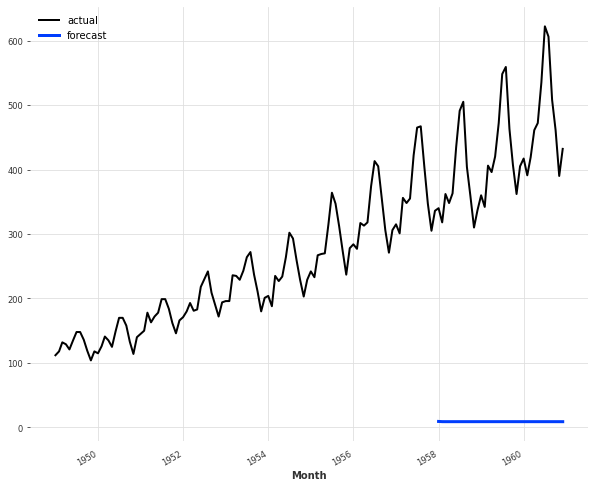

In [106]:
plt.figure(figsize=(10,8))
series.plot(label='actual')
prediction_lstm.plot(label='forecast', lw=3)
plt.legend()
plt.show()

In [108]:
eval(val,prediction_lstm)

MAPE: 97.82693783560887
MAE: 419.47630730848863
MSE: 182080.52929867888
RMSE: 426.7089515099008
